In [31]:
## Get training and test sets for the regression model. 
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
regression_data = pd.read_csv('regression_model_data.csv')
regression_data.drop(columns='Unnamed: 0', inplace=True)

In [32]:
X = regression_data.drop(columns='pIC50')
y = regression_data.pIC50

# Multiple Linear Regression with Polynomial terms 

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=44)

In [34]:
### Now, run models again for regression type data.
## First model will be a multiple linear regression model. 
from sklearn.linear_model import LinearRegression
MLR = LinearRegression().fit(X_train, y_train)

In [35]:
r_sq = MLR.score(X_train, y_train)  ## Calculate the R^2 value to determine model fit 
r_sq

0.33281408189168216

In [36]:
predictions = MLR.predict(X_test)

In [37]:
import numpy as np
print(np.sqrt(mean_squared_error(y_test, predictions)))

0.9856798535475064


In [38]:
print(mean_absolute_error(y_test, predictions))

0.7805618137797526


Text(0, 0.5, 'Predicted Values')

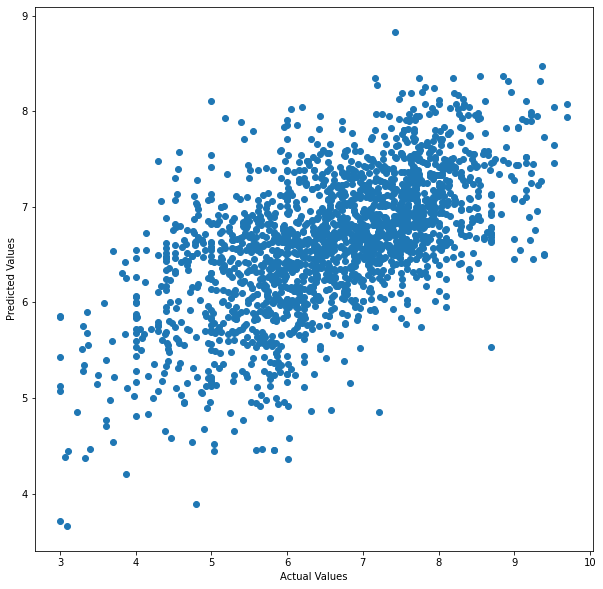

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [40]:
## The results from the multiple linear regression is quite poor, with lots of unexplained variance in our response having 
## no connection to our selected features.The model shows a poor RMSE which is anouhter sign of underfitting our data.

In [41]:
## By looking at the results of the regression and the support vector classification that a linear relationship is not 
## present in the model. To imporve the perfomance of the linear model, we should include higher order polynomials to help
## capture the nonlinear relationship. 

In [42]:
## Now calculate the polynmial features for the set. we will compute up to the third order polynomial.
from sklearn.preprocessing import PolynomialFeatures
poly_data = PolynomialFeatures(2)
X_poly = poly_data.fit_transform(X)

In [43]:
## Before we calculate the poynomials, we should rescale the data using StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_poly = scaler.fit_transform(X_poly)

In [44]:
print("The old dataset had the shape: {}; the new dataset has the shape: {}".format(X.shape,X_scaled_poly.shape))

The old dataset had the shape: (8189, 33); the new dataset has the shape: (8189, 595)


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_poly,y,test_size=0.25, random_state=44)

In [46]:
MLR_2 = LinearRegression().fit(X_train, y_train)

In [47]:
r_sq = MLR_2.score(X_train, y_train)  ## Calculate the R^2 value to determine model fit 
r_sq

0.5965943949613285

In [48]:
## we see a much improved R^2 value, but lets look at other metrics to see if we avoided overfitting. 

In [49]:
predictions = MLR_2.predict(X_test)

In [50]:
print(mean_squared_error(y_test, predictions))

62.27637609158733


Text(0, 0.5, 'Predicted Values')

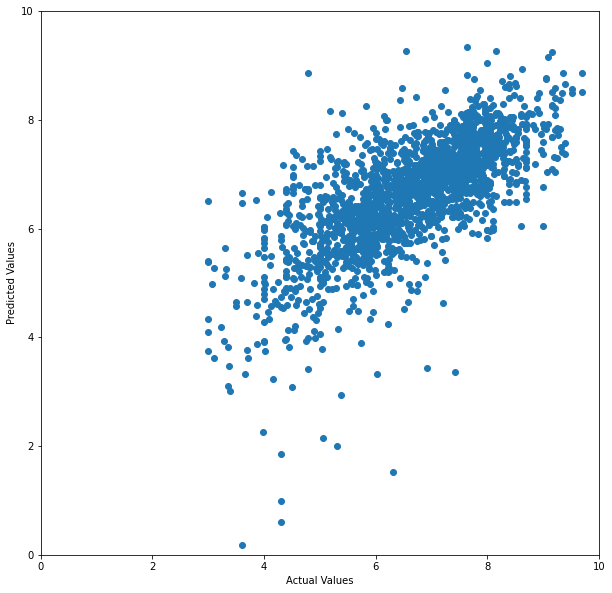

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.xlim(0,10)
plt.ylim(0,10)
plt.ylabel('Predicted Values')

In [52]:
print(mean_absolute_error(y_test, predictions))

0.9265378654578427


In [53]:
predictions

array([7.46916951, 6.58621388, 6.5912927 , ..., 5.97718561, 5.83458083,
       6.7612483 ])

In [54]:
## the results show that despite the impressive model fit, the model seems to make the poor decision of predicting 0 for 
## most , if not all, model instances. 

# Support Vector Regression

In [55]:
## Utilizing the non-linear kernels in support vector machines may allow for better modeling on the non-linear data
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=44)

In [56]:
SVR_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf',C=0.6))
SVR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=0.6))])

In [57]:
predictions = SVR_pipeline.predict(X_test)

In [58]:
print("The mean absolute error: {}".format(mean_absolute_error(y_test, predictions)))

The mean absolute error: 0.6080520387818553


In [59]:
print("The root mean squared error: {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

The root mean squared error: 0.8213411966869648


Text(0, 0.5, 'Predicted Values')

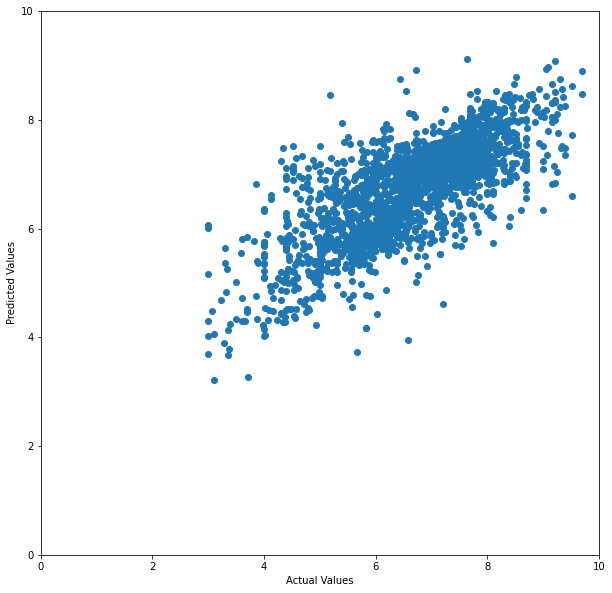

In [60]:
plt.figure(figsize=(10,10))
best = plt.scatter(y_test, predictions)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [61]:
SVR_pipeline.score(X_train, y_train)  ## R^2 value 

0.5963523645014688

In [62]:
X.shape

(8189, 33)

# Feed Forward Neural Network 

In [63]:
## we will be using a deep neural network to predict the pIC50 value, while utilizing K-fold cross validation. 
## First define the nearual network architecture.
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold, cross_val_score 
def deep_learning_model():
    model = Sequential()
    model.add(Dense(120, input_dim=33, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [64]:
deep_model = deep_learning_model()
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               4080      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [65]:
deep_model.fit(X_train, y_train, epochs=150, shuffle=True, verbose=1)

Epoch 1/150
192/192 [==============================] - 1s 3ms/step - loss: 347196217.0425
Epoch 2/150
192/192 [==============================] - 0s 1ms/step - loss: 132724836.0150
Epoch 3/150
192/192 [==============================] - 0s 2ms/step - loss: 1837151055.0102
Epoch 4/150
192/192 [==============================] - 0s 2ms/step - loss: 1249636.1870
Epoch 5/150
192/192 [==============================] - 0s 2ms/step - loss: 22625.6911
Epoch 6/150
192/192 [==============================] - 0s 2ms/step - loss: 13.9134
Epoch 7/150
192/192 [==============================] - 0s 2ms/step - loss: 3.5809
Epoch 8/150
192/192 [==============================] - 0s 1ms/step - loss: 3.0410
Epoch 9/150
192/192 [==============================] - 0s 1ms/step - loss: 13.7028
Epoch 10/150
192/192 [==============================] - 0s 2ms/step - loss: 21.3028
Epoch 11/150
192/192 [==============================] - 0s 2ms/step - loss: 14.5755
Epoch 12/150
192/192 [==============================] - 0

192/192 [==============================] - 0s 2ms/step - loss: 13.6881
Epoch 98/150
192/192 [==============================] - 0s 2ms/step - loss: 1.4731
Epoch 99/150
192/192 [==============================] - 0s 2ms/step - loss: 788.4721
Epoch 100/150
192/192 [==============================] - 0s 2ms/step - loss: 3122828.5569
Epoch 101/150
192/192 [==============================] - 0s 2ms/step - loss: 53.8424
Epoch 102/150
192/192 [==============================] - 0s 2ms/step - loss: 49.9625
Epoch 103/150
192/192 [==============================] - 0s 3ms/step - loss: 1.2516A: 0s - loss: 1.
Epoch 104/150
192/192 [==============================] - 0s 2ms/step - loss: 1.1568
Epoch 105/150
192/192 [==============================] - 0s 2ms/step - loss: 1.3947
Epoch 106/150
192/192 [==============================] - 0s 1ms/step - loss: 1.3773
Epoch 107/150
192/192 [==============================] - 0s 2ms/step - loss: 233.4788
Epoch 108/150
192/192 [==============================] - 0s 2ms

In [66]:
predictions = deep_model.predict(X_test)

In [67]:
print("The mean absolute error: {}".format(mean_absolute_error(y_test, predictions)))

The mean absolute error: 0.8449907699903157


In [68]:
print("The root mean squared error: {}". format(np.sqrt(mean_squared_error(y_test, predictions))))

The root mean squared error: 1.2253226008540798


Text(0, 0.5, 'Predicted Values')

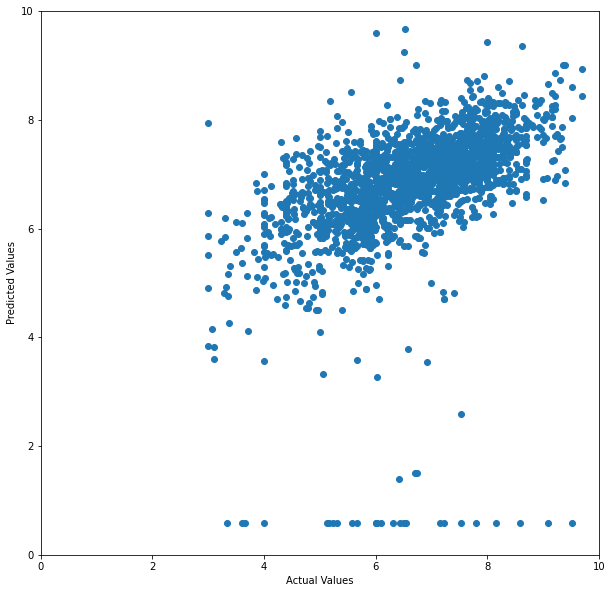

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [70]:
## Despite using a neural network and achieving good measurements for the training data, we get poor predictions of desired
## dependent variable, pIC50. Based on the results of the three regression models, this current dataset would be a poor 
## application for reression type model. The solution would be to make adjustments to the way features were selected, 
## perhaps using more domain expertise to select features. 

In [71]:
## make x and y axis the same values 
